## Генерация и визуализация

In [104]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np


data, data_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=15)

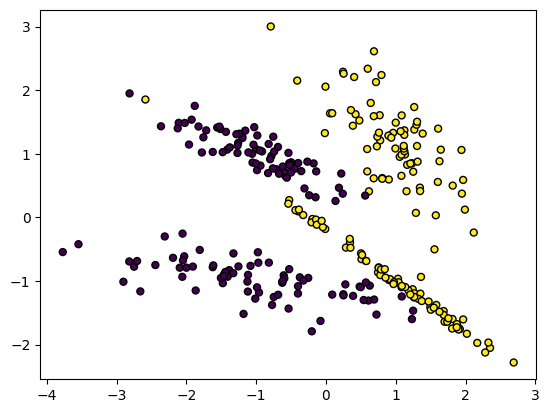

In [105]:
# как видит классификатор
plt.scatter(data[:, 0], data[:, 1], marker="o", c=data_y, s=25, edgecolor="k")
plt.show()

In [106]:
data2, data2_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=891)

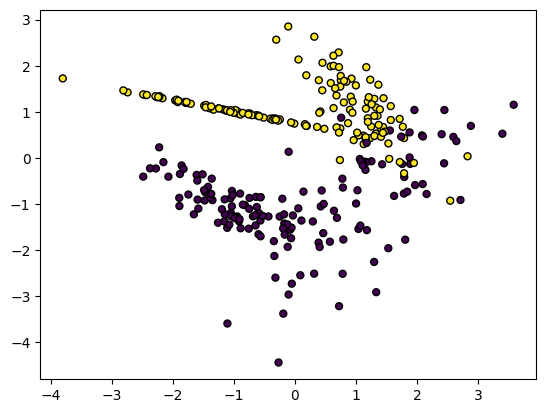

In [107]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

In [108]:
data3, data3_y = make_classification(n_samples=500, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=453)

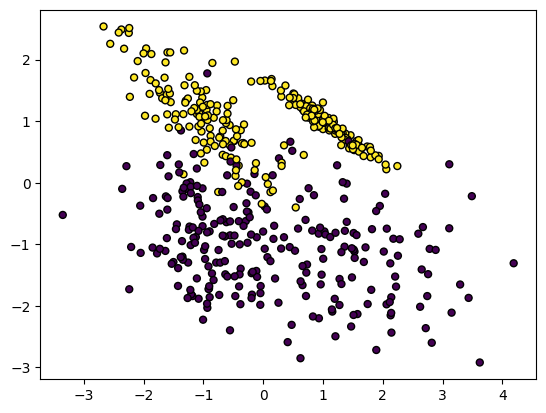

In [109]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score, homogeneity_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

## Подбор гиперпараметра

## Метод локтя

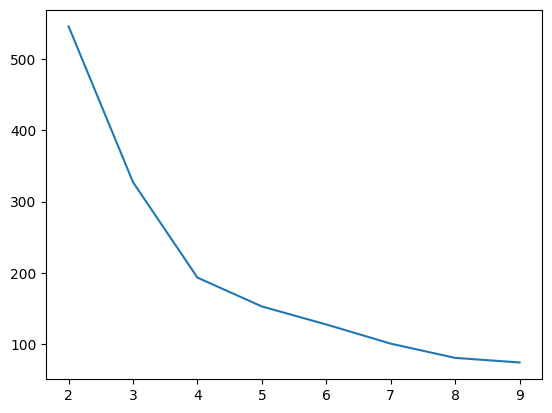

In [80]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

## Метод силуэта

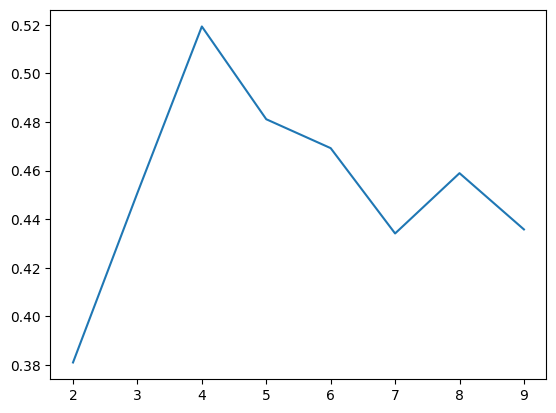

In [81]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data, KMeans(i, n_init='auto').fit(data).labels_))

plt.plot(range(2,10), ss)

## Кластеризация

## KMeans

homogeneity_score:  0.5054282593414651
rand score:  0.6377480490523969
v_measure score:  0.33882268445697833
silhouette score:  0.5193663863345559
davies_bouldin_score:  0.691630851771895


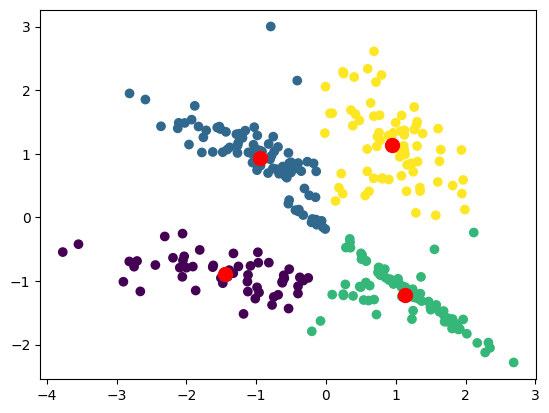

In [82]:
kmeans = KMeans(4, n_init='auto').fit(data)

plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

print("homogeneity_score: ", homogeneity_score(data_y, kmeans.labels_))
print( "rand score: ", rand_score(data_y, kmeans.labels_))
print( "v_measure score: ", v_measure_score(data_y, kmeans.labels_))

print( "silhouette score: ", silhouette_score(data, kmeans.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, kmeans.labels_))

## Affinity propagation

homogeneity_score:  0.643661792274646
rand score:  0.611505016722408
v_measure score:  0.3461884823602302
silhouette score:  0.4591528816996199
davies_bouldin_score:  0.6831793542231627


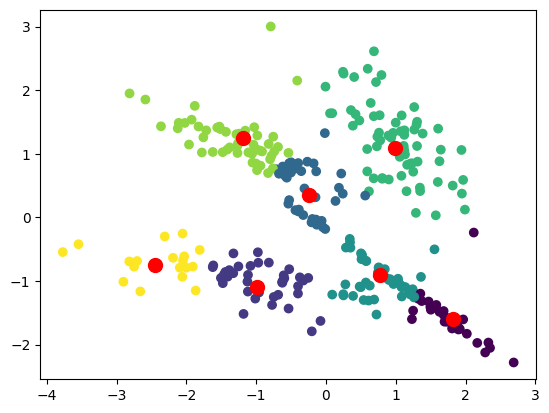

In [83]:
from sklearn.cluster import AffinityPropagation

clustering = AffinityPropagation(preference=-20).fit(data)

plt.scatter(data[:,0], data[:,1], c=clustering.labels_)
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=100, c='red')

print("homogeneity_score: ", homogeneity_score(data_y, clustering.labels_))
print( "rand score: ", rand_score(data_y, clustering.labels_))
print( "v_measure score: ", v_measure_score(data_y, clustering.labels_))

print( "silhouette score: ", silhouette_score(data, clustering.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, clustering.labels_))



## DB-SCAN

[-1  0]
homogeneity_score:  0.002548785052673566
rand score:  0.4984169453734671
v_measure score:  0.0046250809202983394
silhouette score:  0.37080649115352715
davies_bouldin_score:  1.1559637837211887


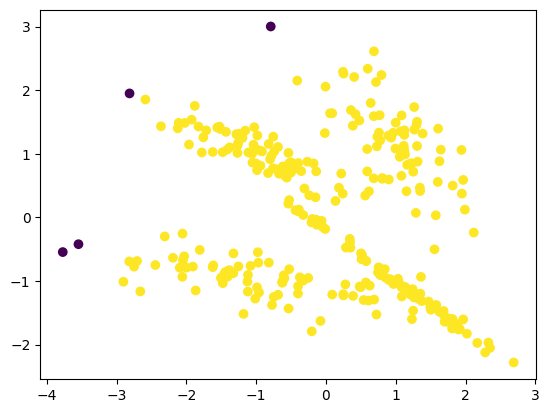

In [84]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN().fit(data)

print(np.unique(dbscan.labels_))

print("homogeneity_score: ", homogeneity_score(data_y, dbscan.labels_))
print( "rand score: ", rand_score(data_y, dbscan.labels_))
print( "v_measure score: ", v_measure_score(data_y, dbscan.labels_))

print( "silhouette score: ", silhouette_score(data, dbscan.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))

plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
homogeneity_score:  0.38074173604630357
rand score:  0.5224080267558529
v_measure score:  0.23181379548087944
silhouette score:  -0.2652233976851149
davies_bouldin_score:  2.0751227871345295


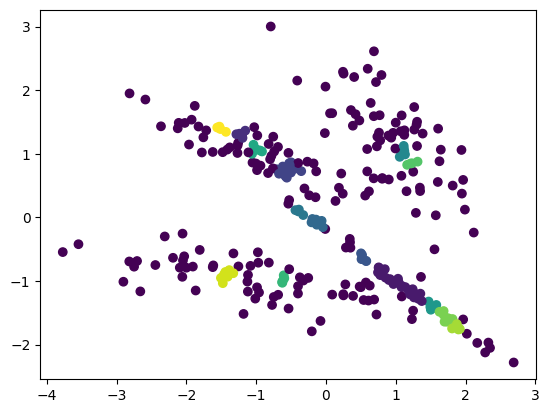

In [85]:
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

print("homogeneity_score: ", homogeneity_score(data_y, dbscan.labels_))
print( "rand score: ", rand_score(data_y, dbscan.labels_))
print( "v_measure score: ", v_measure_score(data_y, dbscan.labels_))

print( "silhouette score: ", silhouette_score(data, dbscan.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))

In [86]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data)
distances, indices = nbrs.kneighbors(data)
distances

array([[0.        , 0.05391267, 0.05711496, 0.0637083 ],
       [0.        , 0.06492858, 0.10149544, 0.14738535],
       [0.        , 0.05674443, 0.0714024 , 0.14211979],
       ...,
       [0.        , 0.06368409, 0.0689623 , 0.06955911],
       [0.        , 0.09368303, 0.13293379, 0.17286085],
       [0.        , 0.13042959, 0.19813669, 0.21443014]])

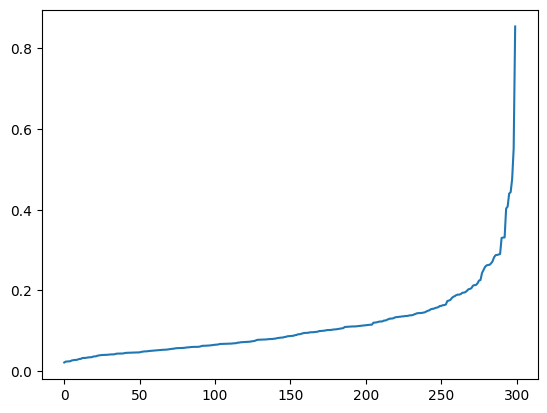

In [87]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8  9]
homogeneity_score:  0.6808363735845875
rand score:  0.6055964325529543
v_measure score:  0.35249255238328975
silhouette score:  0.2686359089816735
davies_bouldin_score:  2.919139922729165


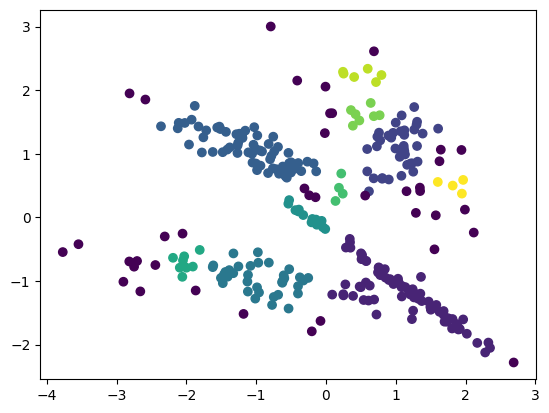

In [111]:
dbscan = DBSCAN(eps=0.25, min_samples=4).fit(data)
print(np.unique(dbscan.labels_))
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_)

print("homogeneity_score: ", homogeneity_score(data_y, dbscan.labels_))
print( "rand score: ", rand_score(data_y, dbscan.labels_))
print( "v_measure score: ", v_measure_score(data_y, dbscan.labels_))

print( "silhouette score: ", silhouette_score(data, dbscan.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, dbscan.labels_))

## Gaussian Mixtures, EM

homogeneity_score:  0.9107922543578906
rand score:  0.7359643255295429
v_measure score:  0.6072986881704374
silhouette score:  0.3936088260758577
davies_bouldin_score:  0.8606780512780913


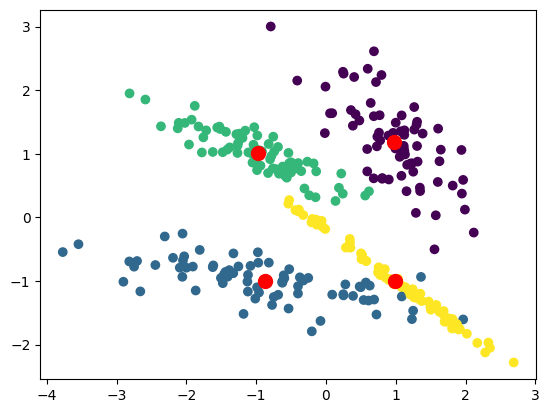

In [89]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=4).fit(data)

gm.predict(data)

plt.scatter(data[:,0], data[:,1], c=gm.predict(data))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

print("homogeneity_score: ", homogeneity_score(data_y, gm.predict(data)))
print( "rand score: ", rand_score(data_y, gm.predict(data)))
print( "v_measure score: ", v_measure_score(data_y, gm.predict(data)))

print( "silhouette score: ", silhouette_score(data, gm.predict(data)))
print( "davies_bouldin_score: ", davies_bouldin_score(data, gm.predict(data)))

## Иерархическая кластеризация

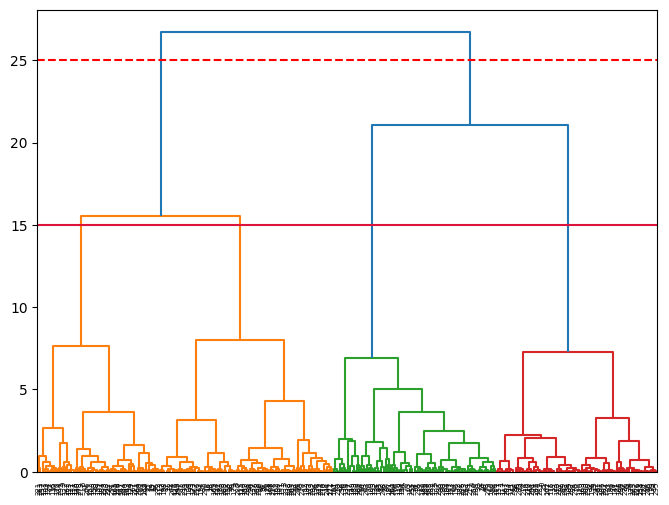

In [90]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(data, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(15, color='crimson'); 

homogeneity_score:  0.5380247505975237
rand score:  0.6487625418060201
v_measure score:  0.3601417605847147
silhouette score:  0.5111514096579063
davies_bouldin_score:  0.7063970206475504


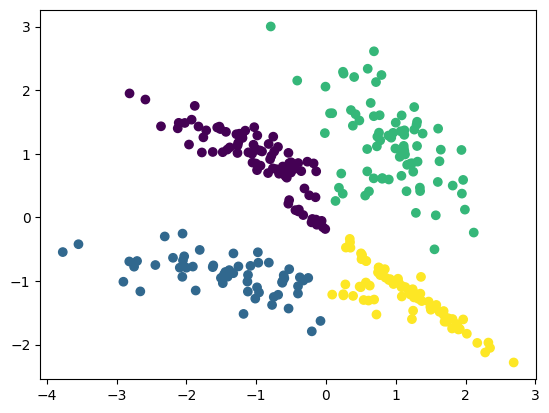

In [91]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(data)
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)


print("homogeneity_score: ", homogeneity_score(data_y, clustering.labels_))
print( "rand score: ", rand_score(data_y, clustering.labels_))
print( "v_measure score: ", v_measure_score(data_y, clustering.labels_))

print( "silhouette score: ", silhouette_score(data, clustering.labels_))
print( "davies_bouldin_score: ", davies_bouldin_score(data, clustering.labels_))

## Карты Кохонена

In [92]:
!pip install sklearn_som 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
from sklearn_som.som import SOM

In [94]:
iris_som = SOM(m=2, n=1, dim=2)
iris_som.fit(data)

In [95]:
predictions = iris_som.predict(data)

print("homogeneity_score: ", homogeneity_score(data_y, iris_som.predict(data)))
print( "rand score: ", rand_score(data_y, iris_som.predict(data)))
print( "v_measure score: ", v_measure_score(data_y, iris_som.predict(data)))

print( "silhouette score: ", silhouette_score(data, iris_som.predict(data)))
print( "davies_bouldin_score: ", davies_bouldin_score(data, iris_som.predict(data)))

homogeneity_score:  0.0015874084759394285
rand score:  0.4994202898550725
v_measure score:  0.0015931642166154949
silhouette score:  0.38741890909613697
davies_bouldin_score:  1.1542381473383299


In [96]:
predictions

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], d

## Kmeans

In [97]:
def KMeanss(data, k=4, num_iter=10, min_distance=0.005, seed=0):
  np.random.seed(seed)
  centroid_ids = np.random.choice(data.shape[0], k, replace=False)
  centroids = data[centroid_ids]

  for i in range(num_iter):
    clusters = {x: [] for x in range(k)}
    res = []
    for x in data:
      distances = np.linalg.norm(centroids - x, axis=1)
      cluster_ind = distances.argmin()
      clusters[cluster_ind].append(x)   
      res.append(cluster_ind)
    new_centroids = {}
    count = []
    for cluster in clusters:
      new_centroids[cluster] = np.mean(clusters[cluster], axis=0)
      count.append(len(clusters[cluster]))
    new_centroids = np.array(list(new_centroids.values()))
    is_stop = True
    for cluster in range(len(centroids)):
      if np.linalg.norm(centroids[cluster] - new_centroids[cluster]) > min_distance:
        is_stop = False
        break
    if is_stop:
      print(f'stopping at iter {i}')
      break
    centroids = new_centroids

  return centroids, clusters, res

In [98]:
centroids, clusters, res = KMeanss(data)

print(res)

print("homogeneity_score: ", homogeneity_score(data_y, res))
print( "rand score: ", rand_score(data_y, res))
print( "v_measure score: ", v_measure_score(data_y, res))

print( "silhouette score: ", silhouette_score(data, res))
print( "davies_bouldin_score: ", davies_bouldin_score(data, res))


stopping at iter 6
[0, 0, 1, 2, 1, 1, 3, 1, 2, 3, 0, 2, 2, 2, 0, 0, 2, 1, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 3, 1, 3, 3, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 3, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 3, 0, 3, 1, 2, 1, 3, 0, 3, 1, 2, 1, 0, 0, 3, 1, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 3, 0, 3, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 3, 3, 3, 3, 0, 2, 0, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, 0, 1, 0, 0, 2, 2, 0, 1, 2, 3, 3, 1, 0, 2, 2, 1, 1, 2, 1, 0, 3, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 2, 3, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 3, 1, 0, 1, 1, 1, 2, 2, 1, 1, 3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 3, 0, 2, 3, 0, 3, 0, 1, 0, 1, 2, 1, 2, 1, 2, 3, 3, 2, 0, 0, 0, 2, 1, 2, 0, 2, 1, 3, 3, 1, 1, 2, 2, 2, 3, 0, 0, 3, 2, 2, 0, 0, 1, 2, 1, 3, 3, 3, 0, 1, 1, 3, 2, 3, 1, 1, 3, 1, 2, 0, 1, 2, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 3, 1, 2, 0, 2, 0, 3, 1, 2, 0, 2, 1, 2, 2, 2, 3, 2, 0, 0, 0, 2, 2]
homogeneity_score:  0.5054282593414651
rand score:  0.6377480490523969
v_measure

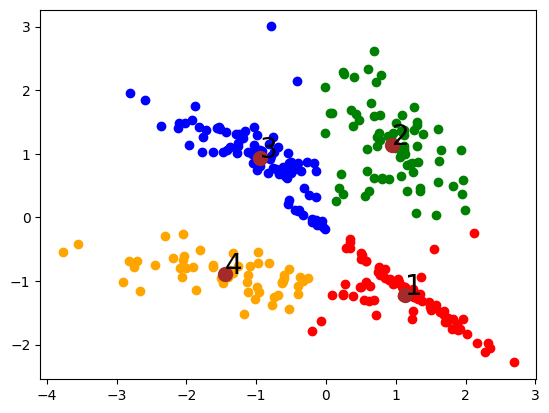

In [99]:
colors = ['red', 'green', 'blue','orange']
for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='o', s=100, c='brown')
    plt.text(centr[0], centr[1], f'{i+1}', fontsize=20);

In [100]:
centroids, clusters, res = KMeanss(data2)

print(res)

print("homogeneity_score: ", homogeneity_score(data2_y, res))
print( "rand score: ", rand_score(data2_y, res))
print( "v_measure score: ", v_measure_score(data2_y, res))

print( "silhouette score: ", silhouette_score(data2, res))
print( "davies_bouldin_score: ", davies_bouldin_score(data2, res))


[2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 3, 2, 2, 2, 0, 0, 1, 1, 3, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 3, 3, 1, 3, 2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 3, 2, 3, 0, 0, 1, 2, 2, 1, 2, 0, 0, 3, 1, 0, 0, 2, 3, 2, 3, 3, 0, 2, 3, 3, 1, 1, 2, 3, 2, 3, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 3, 1, 2, 0, 2, 3, 2, 3, 2, 1, 3, 2, 0, 2, 2, 3, 2, 2, 3, 0, 2, 1, 3, 3, 1, 0, 2, 3, 1, 1, 2, 3, 0, 2, 1, 2, 2, 1, 2, 2, 0, 3, 1, 2, 0, 2, 1, 1, 3, 3, 3, 2, 2, 1, 2, 2, 3, 1, 2, 0, 0, 2, 2, 3, 2, 3, 2, 2, 0, 3, 3, 2, 3, 3, 3, 2, 1, 0, 2, 1, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 1, 0, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 2, 1, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 3, 3, 1, 2, 3, 1, 2, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 3]
homogeneity_score:  0.622490427364346
rand score:  0.6439018952062431
v_measure score:  0.427408088

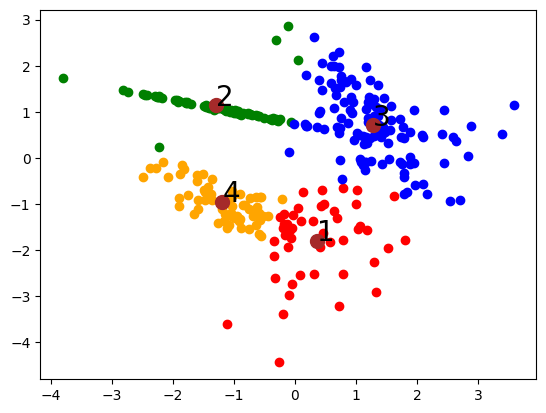

In [101]:
colors = ['red', 'green', 'blue','orange']
for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='o', s=100, c='brown')
    plt.text(centr[0], centr[1], f'{i+1}', fontsize=20);

In [102]:
centroids, clusters, res = KMeanss(data3)

print(res)

print("homogeneity_score: ", homogeneity_score(data3_y, res))
print( "rand score: ", rand_score(data3_y, res))
print( "v_measure score: ", v_measure_score(data3_y, res))

print( "silhouette score: ", silhouette_score(data3, res))
print( "davies_bouldin_score: ", davies_bouldin_score(data3, res))


[0, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 0, 3, 1, 0, 1, 1, 2, 1, 1, 3, 1, 1, 1, 0, 2, 2, 1, 1, 1, 3, 2, 3, 0, 2, 2, 3, 1, 0, 3, 0, 1, 2, 2, 0, 3, 1, 1, 0, 3, 3, 3, 1, 3, 0, 1, 2, 3, 3, 3, 2, 3, 0, 0, 1, 0, 3, 1, 3, 3, 0, 2, 0, 1, 2, 1, 3, 3, 1, 3, 2, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 3, 1, 2, 0, 2, 0, 2, 1, 1, 0, 3, 2, 3, 2, 2, 1, 2, 0, 3, 1, 2, 1, 1, 3, 1, 0, 2, 2, 2, 3, 3, 2, 0, 2, 3, 1, 1, 2, 3, 0, 3, 3, 3, 2, 3, 0, 3, 1, 3, 2, 1, 0, 3, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 3, 3, 1, 3, 0, 3, 2, 0, 2, 2, 2, 0, 0, 1, 0, 1, 3, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 3, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 3, 2, 3, 0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 3, 3, 1, 1, 3, 3, 2, 1, 3, 1, 0, 3, 1, 1, 3, 0, 3, 3, 3, 1, 2, 3, 2, 3, 2, 3, 0, 2, 3, 3, 1, 2, 1, 2, 1, 0, 1, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 1, 0, 3, 2, 3, 1, 2, 3, 3, 1, 0, 2, 3, 2, 3, 1, 1, 3, 2, 3, 2, 1, 0, 3, 2, 3, 3, 2, 0, 2, 2, 1, 3, 2, 3, 2, 1, 0, 1, 3, 2, 3, 3, 1, 0, 1, 3, 0, 3, 3, 1, 3, 1, 2, 2, 0, 1, 0, 1, 0, 1, 3, 3, 0, 0, 2, 3, 

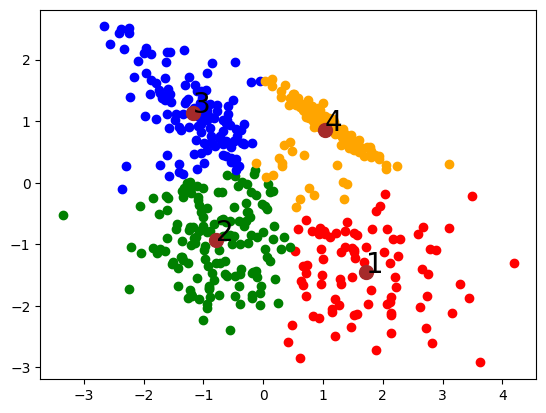

In [103]:
colors = ['red', 'green', 'blue','orange']
for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='o', s=100, c='brown')
    plt.text(centr[0], centr[1], f'{i+1}', fontsize=20);